In [ ]:

Reema Abdullah Aldanish


# 1. Data Loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import the files module from the google.colab package ..
from google.colab import files
# Upload kaggle.json ..
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d patelprashant/employee-attrition
!unzip employee-attrition.zip
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (9).csv
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open employee-attrition.zip, employee-attrition.zip.zip or employee-attrition.zip.ZIP.


# 2. Exploratory Data Analysis

In [ ]:
# Number of rows and columns ..
(df.shape)

(1470, 35)

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# Prints the first 5 rows of the DataFrame ..
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...


The data includes quantitative information like age and daily rate, and categorical data such as attrition status and department.

In [ ]:
# data types of each column in the DataFrame ..
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   


The data includes numerical types (int64) for quantitative variables and string types (object) for categorical variables, reflecting a mix of quantitative and qualitative data in the dataset.

In [ ]:
# Check for missing values ..
print(df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince


The output shows no missing values in any column of the DataFrame, indicating the dataset is fully populated.

In [ ]:
# Check for duplicate rows ..
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
if df['Attrition'].isnull().any():
    raise ValueError("NaN values found in 'Attrition' column")
# Label encode categorical variables ..
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
# Transform non-numeric columns to numeric ..
    df[column] = label_encoder.fit_transform(df[column])
if df.isnull().any().any():
    raise ValueError("NaN values were introduced during label encoding")
X = df.drop('Attrition', axis=1)
y = df['Attrition']
# Split your dataset into training and testing sets ..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
# Check if y_train contains any NaN values after the split ..
if y_train.isnull().any():
    raise ValueError("NaN values found in y_train after train-test split")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


The code first checks for missing values in the 'Attrition' column, then transforms non-numeric columns to numeric using label encoding. Next, it splits the data into training and testing sets, ensuring no missing values in y_train. Finally, it trains a Random Forest model on the data, preparing it for predictions.

In [ ]:
print(df.head())

   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         1             80                

After executing the code, categorical data in the dataset were converted to numerical format to facilitate analysis and modeling, such as transforming 'Attrition' into values 1 and 0.

In [ ]:
df.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

The dataset has been entirely converted to numerical format (int64)

# 3. Visualization

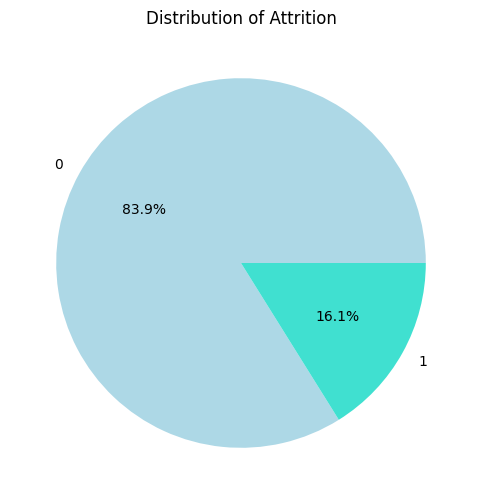

In [ ]:
species_counts = df['Attrition'].value_counts()
# Create the pie chart ..
plt.figure(figsize=(8, 6))
plt.pie(species_counts, labels=species_counts.index,
autopct='%1.1f%%', colors=['lightblue', 'turquoise'])
plt.title('Distribution of Attrition')
plt.show()

presenting "Attrition" data as a pie chart, contrasting the counts of employees who have stayed (0) against those who have left (1).

# 3.1 Features Importance:


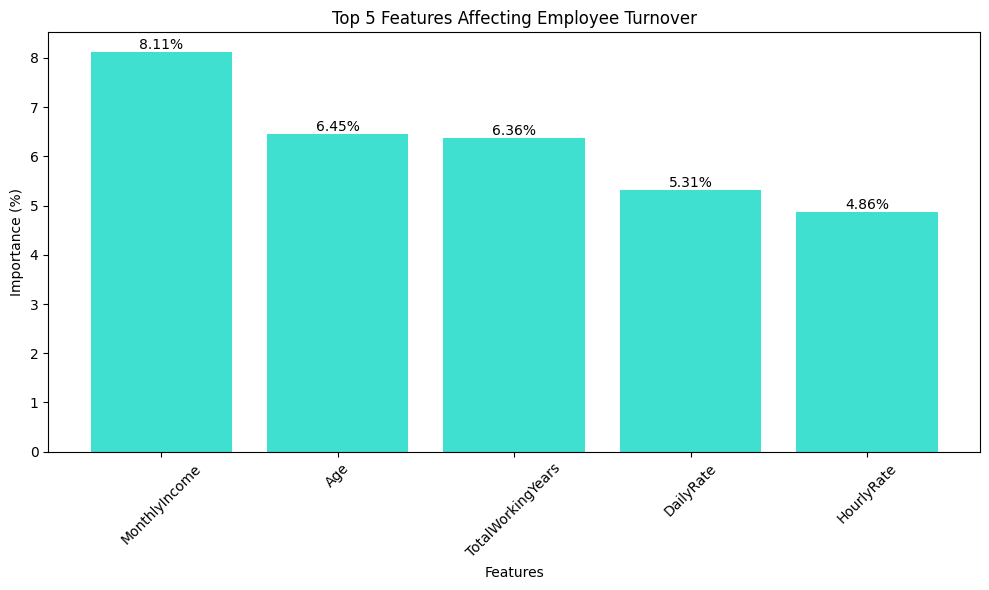

In [ ]:
# Extracting feature importances and calculating their percentage contribution ..
feature_importances = rf.feature_importances_
feature_importances_percent = 100 * (feature_importances / feature_importances.sum())
# Sorting the feature importances in descending order to find the top 5 ..
indices = np.argsort(feature_importances_percent)[::-1]
top_indices = indices[:5]
# Visualizing the top 5 feature importances ..
plt.figure(figsize=(10, 6))
bars = plt.bar(range(5), feature_importances_percent[top_indices], color='turquoise', align='center')
# Annotating each bar with its percentage of importance ..
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}%', ha='center', va='bottom')
plt.title('Top 5 Features Affecting Employee Turnover')
plt.xticks(range(5), [X.columns[i] for i in top_indices], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance (%)')
plt.tight_layout()
plt.show()




The code analyzes the top 5 features influencing employee turnover using a RandomForestClassifier model. It calculates the feature importances and visualizes them in a bar plot, showing the percentage contribution of each feature to the model's predictive performance.

# 3.2 Correlation Analysis:

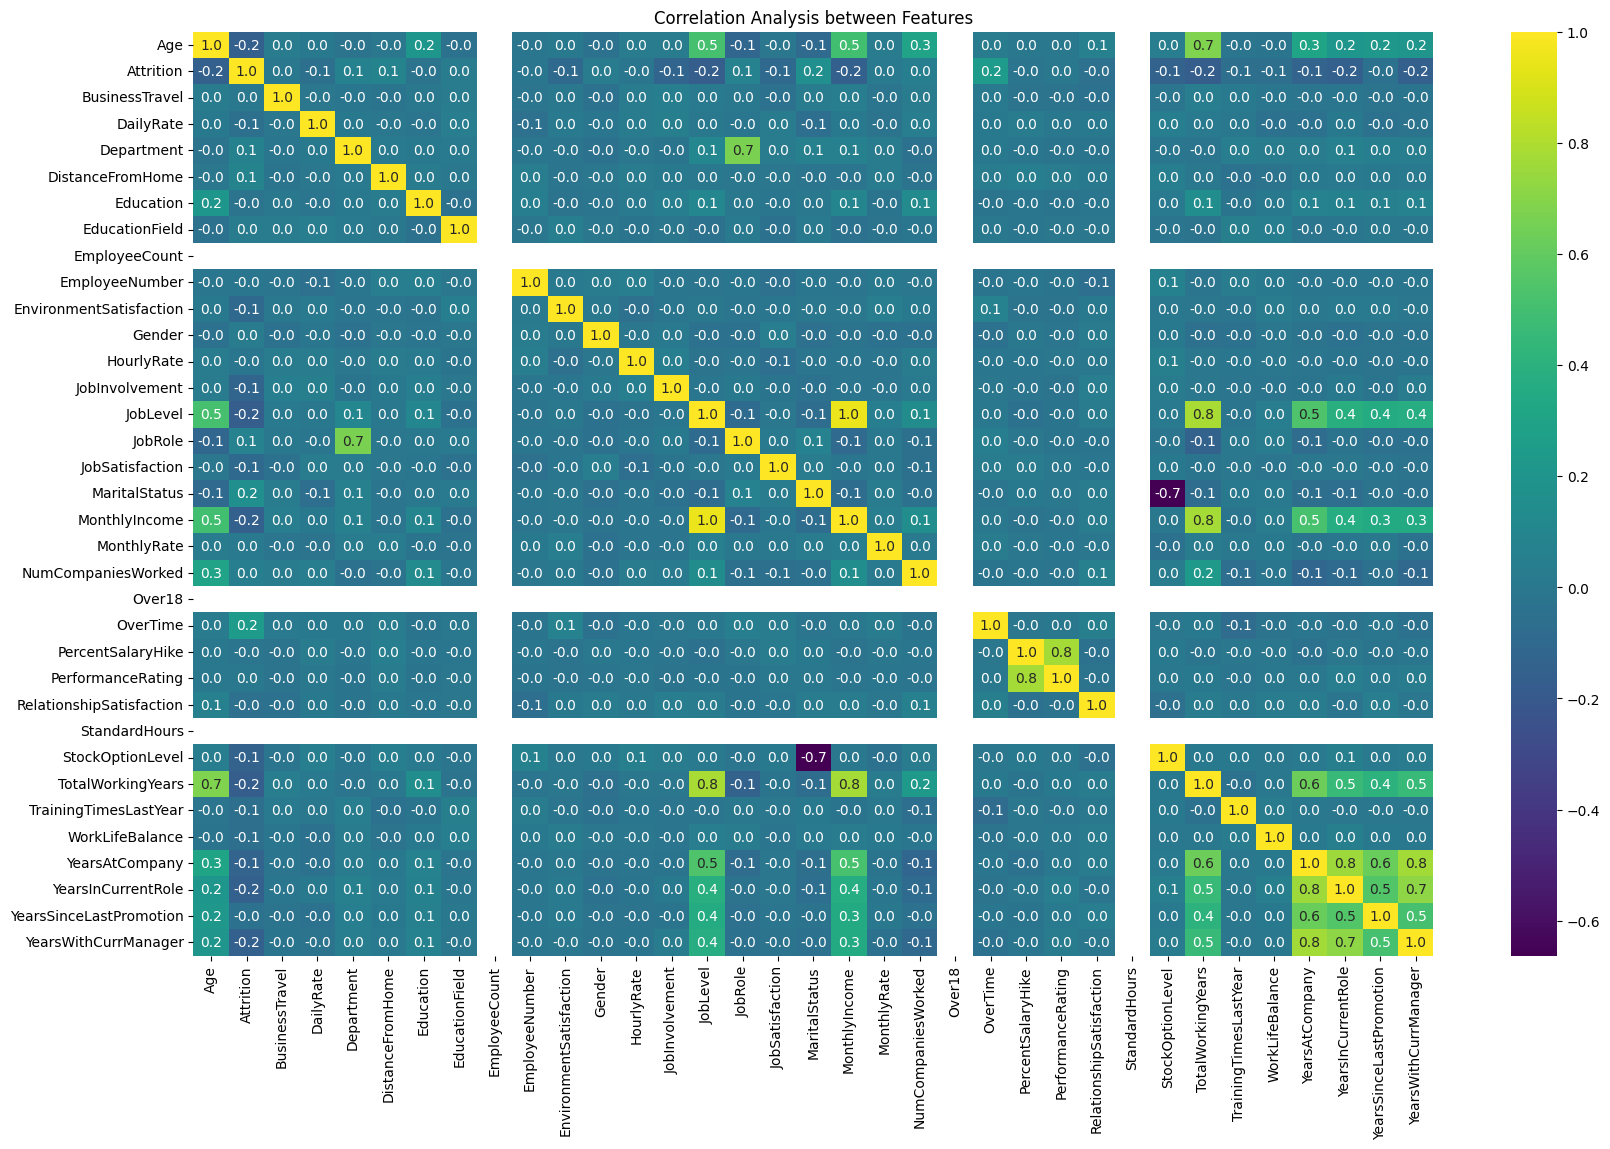

In [ ]:
# Calculate the correlation matrix ..
corr = df.corr()
# Create a heatmap to visualize the correlation matrix ..
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".1f", cmap='viridis')
plt.title('Correlation Analysis between Features')
plt.show()


The code calculates the correlation matrix between different features in the data and visualizes it using a heatmap. This helps identify relationships between variables and the extent of their influence on each other.

# 3.3 Outlier Detection:

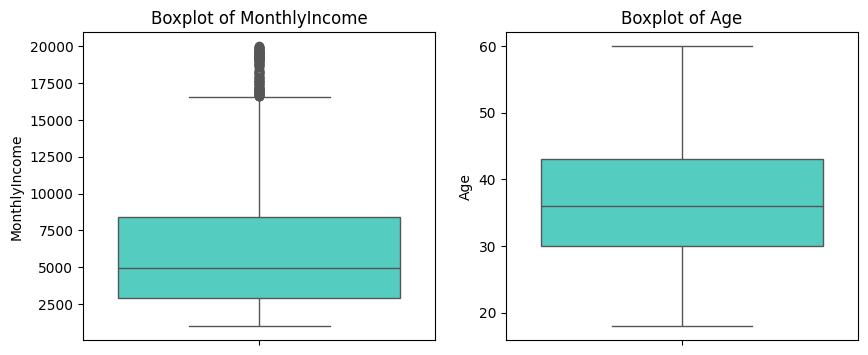

In [ ]:
# Replace 'NumericFeature1' and 'NumericFeature2' with the actual names of the numerical features you want to check for outliers ..
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(y=df['MonthlyIncome'], ax=ax[0], color='turquoise')
ax[0].set_title('Boxplot of MonthlyIncome')
sns.boxplot(y=df['Age'], ax=ax[1], color='turquoise')
ax[1].set_title('Boxplot of Age')
plt.show()


The code generates boxplots for the 'MonthlyIncome' and 'Age' numerical features to identify any outliers. These visualizations provide insights into the distribution and potential extreme values within each feature.
As shown in the boxplot, there are several outliers in the monthly income distribution, indicated by the points above the upper whisker, signifying that some employees have a monthly income that exceeds the typical range of salaries in the provided dataset.

# How is attrition affected by gender?

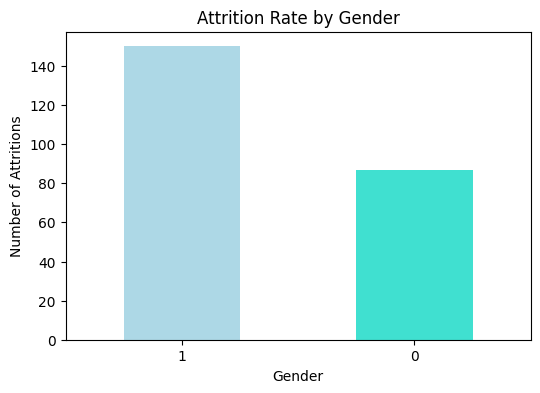

In [ ]:
attrition_data = df[df['Attrition'] == 1]
# Count the number of entries for each gender ..
gender_counts = attrition_data['Gender'].value_counts()
# Visualize the data ..
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['lightblue', 'turquoise'])
plt.title('Attrition Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Attritions')
plt.xticks(rotation=0)
plt.show()

The code creates a pair of pie charts, placed side by side, to visualize attrition rates by gender. The slices in each pie chart indicate responses of "No" and "Yes" to attrition, colored in light blue and turquoise, respectively. The percentages for each category are shown within the corresponding slices of the pie. Each chart is titled to reflect the gender category it represents—either Male or Female—and collectively, they're under the overarching title "Attrition Rates by Gender."

# What is the effect of the distance from home on attrition?

In [ ]:
import plotly.graph_objects as go
# Filter the DataFrame for cases where Attrition equals 1 ..
attrition_data = df[df['Attrition'] == 1]
attrition_by_distance = attrition_data['DistanceFromHome'].value_counts().reset_index()
attrition_by_distance.columns = ['DistanceFromHome', 'AttritionCount']
# Sort the data by distance for plotting ..
attrition_by_distance.sort_values('DistanceFromHome', inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=attrition_by_distance['DistanceFromHome'],
    y=attrition_by_distance['AttritionCount'],
    mode='lines+markers',
    name='Attrition Count',
    line=dict(color='turquoise')
))
fig.update_layout(
    title="Attrition Count by Distance From Home",
    xaxis_title="Distance From Home",
    yaxis_title="Attrition Count",
    template="plotly_white",
    width=800,
    height=400
)
fig.show()

The line chart indicates that employee attrition is highest close to the workplace and fluctuates with distance. There’s no clear trend showing distance directly correlating with attrition, suggesting other factors may also be influential.

# 5. Insightful Analysis


# 5.1 Analyzing the visualizations to derive insights regarding employee turnover.


Upon analyzing the visualizations provided, several insights regarding employee turnover can be derived:

* Attrition Distribution: The bar chart shows the distribution of attrition status among employees. It indicates that there is a significant proportion of employees who have not experienced attrition compared to those who have.

* Feature Importance: The visualization of the top 5 features affecting employee turnover, as determined by the Random Forest Classifier, reveals the most influential factors. Understanding these features can help prioritize areas for intervention or improvement within the organization.

* Correlation Analysis: The correlation heatmap provides insights into the relationships between different features in the dataset. Identifying highly correlated features can guide decision-making processes and highlight potential areas of focus for reducing turnover.

* Outlier Detection: The boxplots help identify outliers in numerical features such as 'MonthlyIncome' and 'DistanceFromHome'. Outliers may indicate specific cases or patterns that contribute to turnover and warrant further investigation.

* Attrition Rates by Gender and Distance from Home: The pie charts and scatter plot visualize attrition rates based on gender and distance from home, respectively. These visualizations can reveal potential trends or patterns in turnover behavior related to these factors.


# 5.2 impact of different features on turnover.

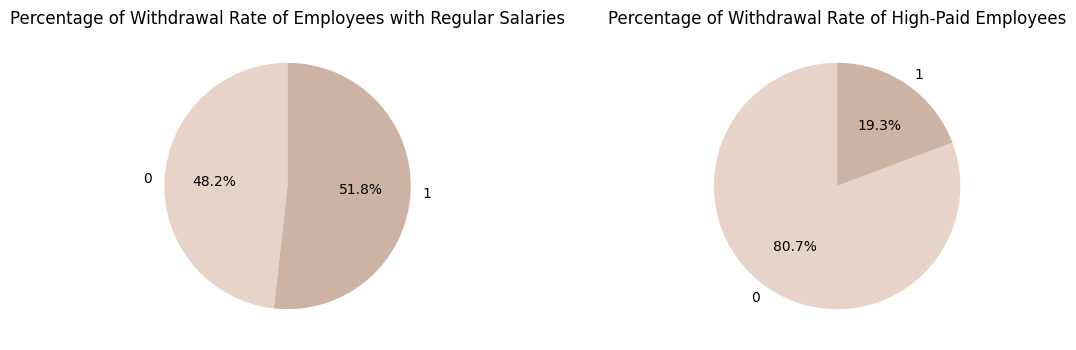

In [ ]:

# Calculating IQR and identifying outliers ..
Q1 = df['MonthlyIncome'].quantile(0.25)
Q3 = df['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
outliers = (df['MonthlyIncome'] < (Q1 - 1.5 * IQR)) | (df['MonthlyIncome'] > (Q3 + 1.5 * IQR))
# Adding 'Outlier' column to the DataFrame ..
df['Outlier'] = 'Regular'
df.loc[outliers, 'Outlier'] = 'Outlier'
outlier_distribution = df.groupby(['Attrition', 'Outlier']).size().reset_index(name='Count')
# Creating a pivot table for visualization ..
pivot_table = outlier_distribution.pivot(index='Outlier', columns='Attrition', values='Count')
# Calculating percentages for regular and outlier salary groups ..
pivot_table_percentage = pivot_table.divide(pivot_table.sum())
colors = ['#E8D3C9', '#CCB3A3']
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
axs[0].pie(pivot_table_percentage.loc['Regular'], labels=pivot_table_percentage.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axs[0].set_title('Percentage of Withdrawal Rate of Employees with Regular Salaries')
axs[1].pie(pivot_table_percentage.loc['Outlier'], labels=pivot_table_percentage.columns, autopct='%1.1f%%', startangle=90, colors=colors)
axs[1].set_title('Percentage of Withdrawal Rate of High-Paid Employees')
plt.show()


The pie charts illustrate employee attrition rates based on salary levels. Employees with regular salaries have a nearly even attrition rate, with about half staying and half leaving. However, high-paid employees show a different trend, with a vast majority choosing to stay, indicating that higher salaries may contribute significantly to employee retention.

In [ ]:
fig = go.Figure(data=[
    go.Scatter(
        x=attrition_rate_by_age_group.index,
        y=attrition_rate_by_age_group.values,
        mode='markers',
        marker=dict(
            size=size_by_age_group,
            sizemode='area',
            sizeref=2.*max(size_by_age_group)/(70.**2),
            sizemin=4,
            color='#CCB3A3'
        )
    )
])

# Update the layout with background color and figure size ..
fig.update_layout(
    title='Attrition Rates by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Attrition Rate',
    showlegend=False,
    plot_bgcolor='white',
    width=600,
    height=400
)
fig.show()

The code creates a chart that visualizes the effect of age on attrition rates. The attrition rates are highest for the youngest age group (18-25), then decrease for the middle age groups (26-43), and slightly increase again for the older age group (44-60).